<a href="https://colab.research.google.com/github/dakyommii/study/blob/main/cat_and_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [2]:
#Initialising the CNN
classifier = Sequential()

In [3]:
#Step1. Convolution
classifier.add(Conv2D(32,(3,3), input_shape = (64,64,3),activation = 'relu'))

In [4]:
#step2. Pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [5]:
#Adding a second convolutional layer
classifier.add(Conv2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [6]:
#Step 3 - Flattening
classifier.add(Flatten())

In [7]:
#Step 4 - Full connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))

In [8]:
#Compiling the CNN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/lecture hands on lab/datasets/training_set',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/lecture hands on lab/datasets/test_set',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')
classifier.fit_generator(training_set,
steps_per_epoch = 8000,
epochs = 25,
validation_data = test_set,
validation_steps = 2000)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
8000/8000 [==============================] - 2068s 256ms/step - loss: 0.6588 - accuracy: 0.6033 - val_loss: 0.5991 - val_accuracy: 0.6836


In [24]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/lecture hands on lab/datasets/single_prediction/dog-prdt.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

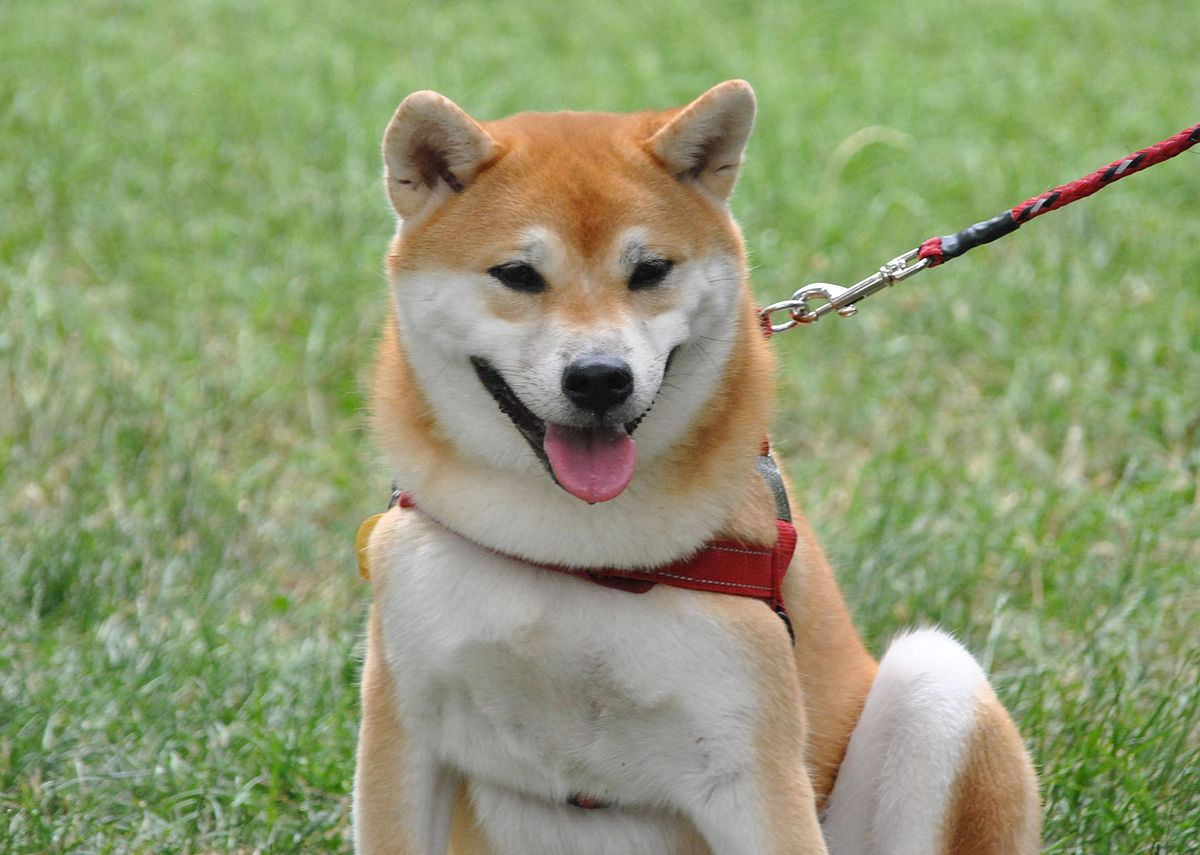

In [26]:
from IPython.display import Image
Image('/content/drive/My Drive/lecture hands on lab/datasets/single_prediction/dog-prdt.png')

In [27]:
print(prediction)

dog
